#### [Data set here :](https://drive.google.com/file/d/18GCWBtvax7fDofE1LHz27oJ6Q68lEsK8/view?usp=sharing)

# Import necessary liberaries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv(r"CarPrice_Assignment.csv")
pd.options.display.max_columns= None
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Data Exploration

In [3]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [4]:
for col in df.columns:
    print(f"{col: <15} {df[col].nunique(): >5}")

car_ID            205
symboling           6
CarName           147
fueltype            2
aspiration          2
doornumber          2
carbody             5
drivewheel          3
enginelocation      2
wheelbase          53
carlength          75
carwidth           44
carheight          49
curbweight        171
enginetype          7
cylindernumber      7
enginesize         44
fuelsystem          8
boreratio          38
stroke             37
compressionratio    32
horsepower         59
peakrpm            23
citympg            29
highwaympg         30
price             189


### One hot encoding

In [8]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [9]:
df = pd.get_dummies(df, columns = ['fueltype', 'aspiration', 'doornumber','carbody', 'drivewheel', 'enginelocation', 'wheelbase','enginetype',
       'cylindernumber','fuelsystem'])

In [10]:
### Split the data for train and test
X = df.drop(columns = ['car_ID','CarName', 'price'])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 42)

In [11]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [12]:
y_pred = regressor.predict(X_test)

In [13]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2= r2_score(y_test, y_pred)

print(f"{'Mean Absolute Error:': <30}", mae)
print(f"{'Mean Squared Error:': <30} ", mse)
print(f"{'Root Mean Squared Error: ': <30} ", rmse)
print(f"{'r2 score: ': <30}", r2)

Mean Absolute Error:           1989.0569024390243
Mean Squared Error:             9231441.510192415
Root Mean Squared Error:        3038.3287363602403
r2 score:                      0.8830634491715993


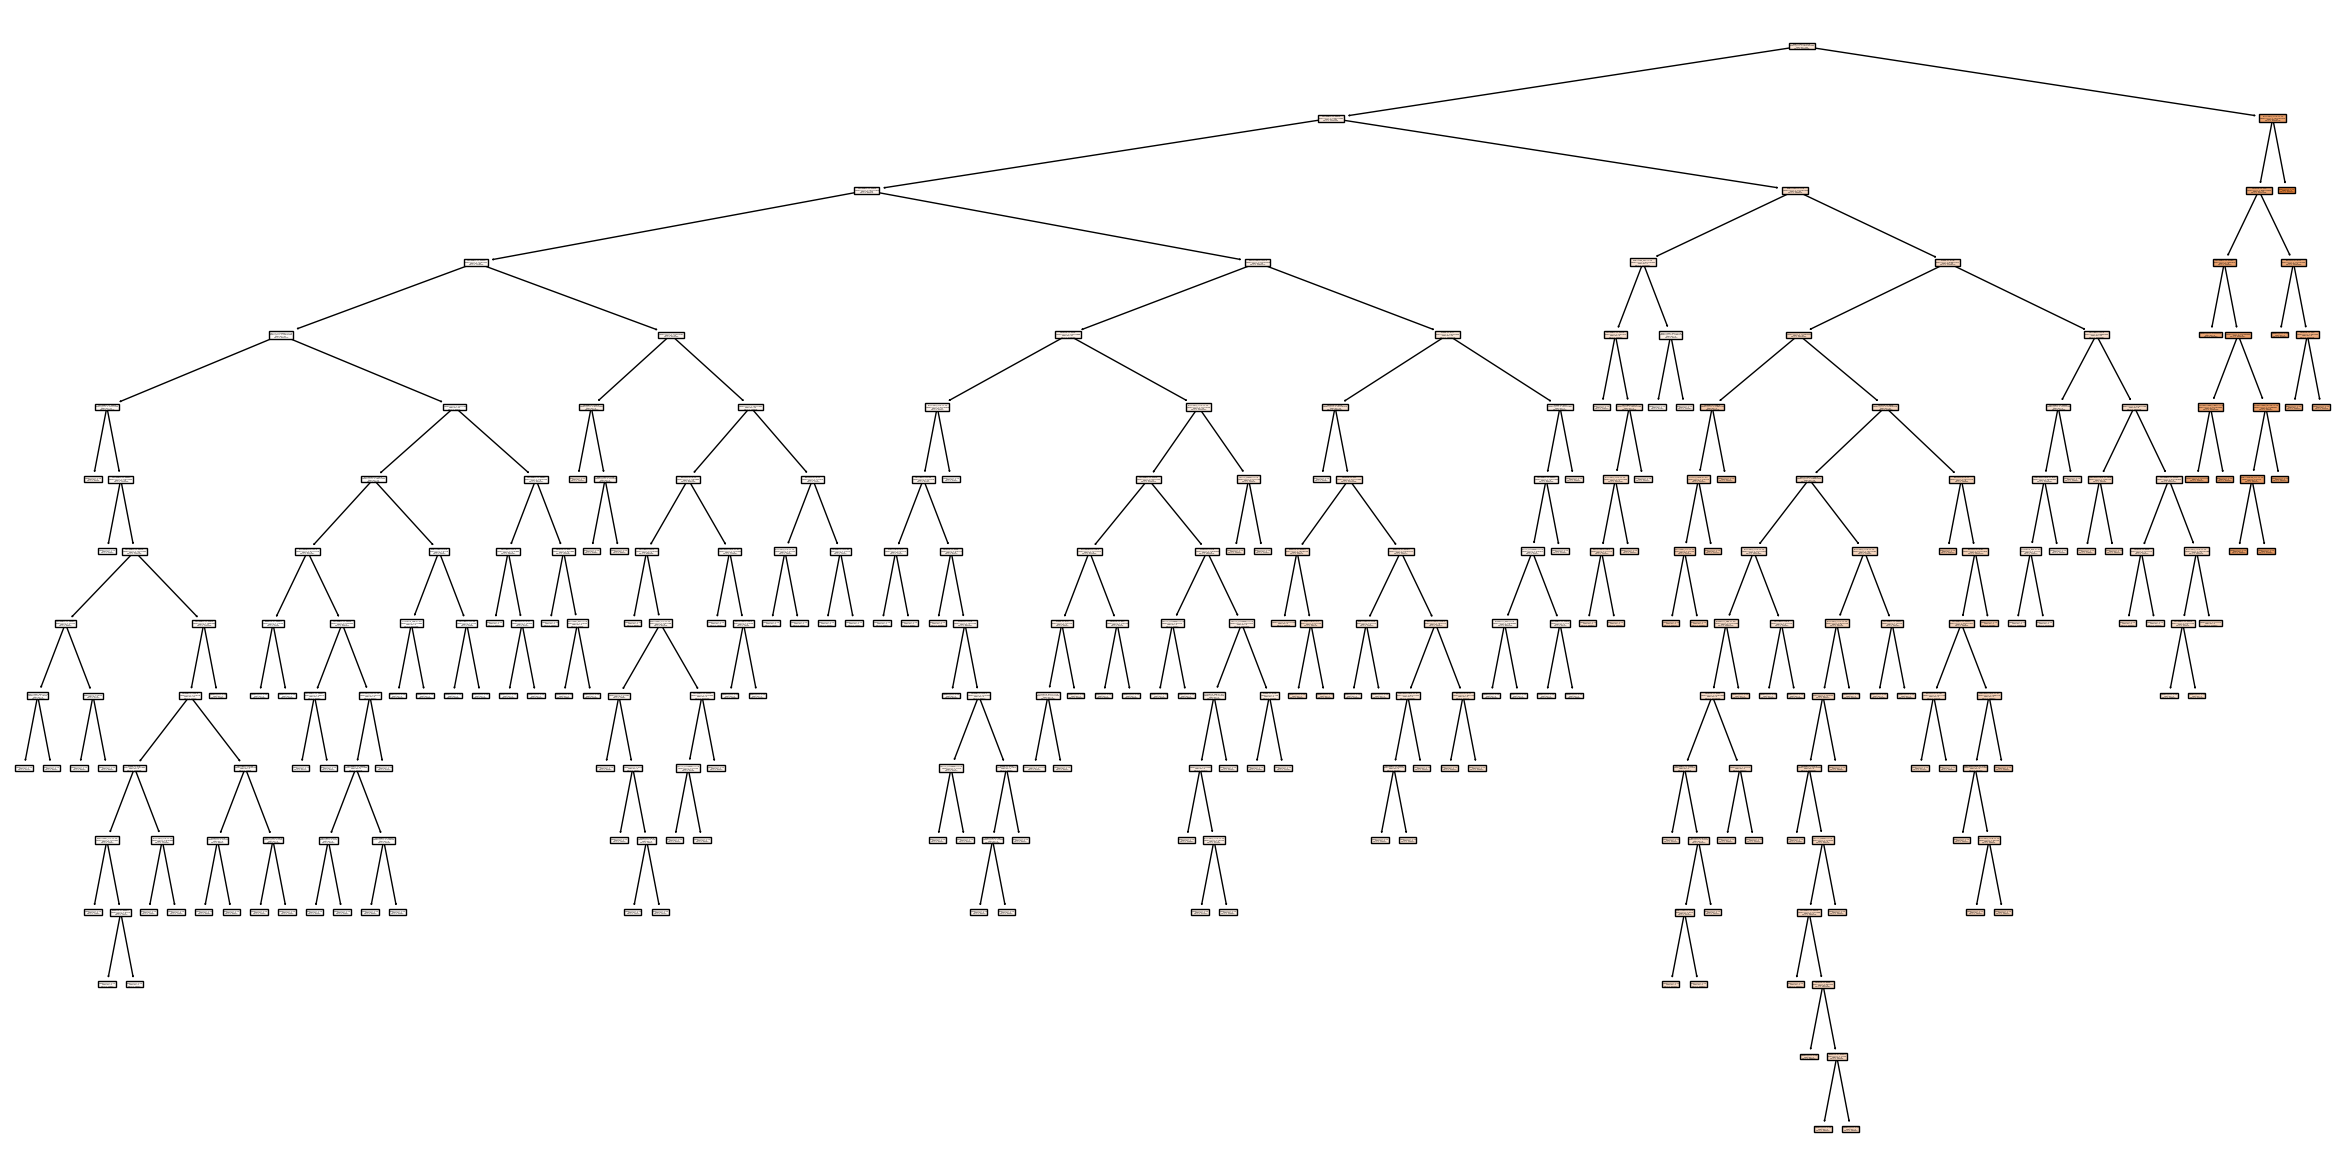

In [19]:
feature_names=X.columns
plt.figure(figsize=(30, 15))
plot_tree(regressor, filled=True, feature_names=list(feature_names))
plt.show()